In [27]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

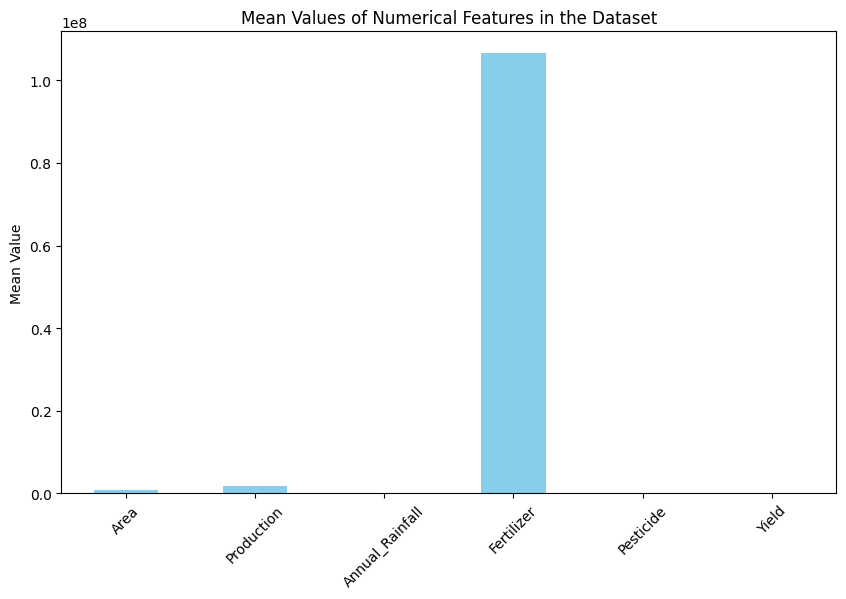

In [19]:
#Bar chart
df.describe().loc['mean'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Mean Values of Numerical Features in the Dataset')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Loading the Dataset
df=pd.read_csv("/content/rice_updated10k.csv")
# Preprocessing
df.dropna(inplace=True)
X = df.drop(columns=['Yield', 'Crop'])
y = df['Yield']

In [30]:
# Encode categorical variables
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), ["Season", "State"])],
    remainder='passthrough'
)

X = pd.DataFrame(ct.fit_transform(X))

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
#Random Forest

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

Mean Squared Error: 0.01265491896294629
R^2 Score: 0.9809265328978679


In [32]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}")

Mean Squared Error: 0.17771836952007738
R^2 Score: 0.7321432492447533


In [35]:
#Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Mean Squared Error: 0.016308146777584825
R^2 Score: 0.9754203956603933


In [34]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse_knn}")
print(f"R^2 Score: {r2_knn}")

Mean Squared Error: 0.07391149399336436
R^2 Score: 0.8886007525390226
